# Problem Statement : To predict muffins and cupcackes by svm

## 1. Import the libraries

In [278]:
# Data Science librarry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set(font_scale = 1.2)
# To store plot
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# machine learning repository
from sklearn import svm
# from repo import support vector classifier
from sklearn.svm import SVC

## 2. Data Collection / Import data set

In [279]:
df = pd.read_csv('https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes.csv')

In [280]:
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


## 3.EDA


In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.columns

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type           20 non-null     int32
 1   Flour          20 non-null     int64
 2   Milk           20 non-null     int64
 3   Sugar          20 non-null     int64
 4   Butter         20 non-null     int64
 5   Egg            20 non-null     int64
 6   Baking Powder  20 non-null     int64
 7   Vanilla        20 non-null     int64
 8   Salt           20 non-null     int64
dtypes: int32(1), int64(8)
memory usage: 1.5 KB


In [206]:
df.isna().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [207]:
df.describe()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,0.500000,43.900000,18.550000,17.100000,11.000000,7.200000,1.300000,0.500000,0.0
std,0.512989,7.018022,6.801509,7.538672,4.801316,3.019237,0.732695,0.512989,0.0
min,0.000000,34.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.0
25%,0.000000,38.000000,15.000000,12.000000,7.000000,5.000000,1.000000,0.000000,0.0
50%,0.500000,43.500000,17.000000,17.000000,10.000000,6.000000,1.000000,0.500000,0.0
75%,1.000000,50.000000,24.250000,23.000000,14.250000,9.000000,2.000000,1.000000,0.0
max,1.000000,55.000000,28.000000,31.000000,20.000000,14.000000,3.000000,1.000000,0.0


In [208]:
df.corr()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Type,1.000000,0.891771,0.595840,-0.748525,-0.576955,-0.577684,0.140028,-0.600000,NaN
Flour,0.891771,1.000000,0.653965,-0.823497,-0.663835,-0.612530,0.333677,-0.584768,NaN
Milk,0.595840,0.653965,1.000000,-0.756611,-0.773610,-0.677137,0.387600,-0.399741,NaN
Sugar,-0.748525,-0.823497,-0.756611,1.000000,0.449314,0.443047,-0.482146,0.394677,NaN
Butter,-0.576955,-0.663835,-0.773610,0.449314,1.000000,0.511927,-0.194494,0.448743,NaN
Egg,-0.577684,-0.612530,-0.677137,0.443047,0.511927,1.000000,-0.290259,0.475739,NaN
Baking Powder,0.140028,0.333677,0.387600,-0.482146,-0.194494,-0.290259,1.000000,-0.140028,NaN
Vanilla,-0.600000,-0.584768,-0.399741,0.394677,0.448743,0.475739,-0.140028,1.000000,NaN
Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df.duplicated().sum()

0

In [210]:
df.skew()

Type             0.000000
Flour            0.160854
Milk            -0.781098
Sugar           -0.348605
Butter           0.675233
Egg              0.921981
Baking Powder    0.338976
Vanilla          0.000000
Salt             0.000000
dtype: float64

In [211]:
df.dtypes

Type             int32
Flour            int64
Milk             int64
Sugar            int64
Butter           int64
Egg              int64
Baking Powder    int64
Vanilla          int64
Salt             int64
dtype: object

## Data Visualisation

In [212]:
df['Type'].value_counts()

1    10
0    10
Name: Type, dtype: int64

In [213]:
label = df['Type'].value_counts().index

In [214]:
label

Int64Index([1, 0], dtype='int64')

In [215]:
df['Type'].value_counts()

1    10
0    10
Name: Type, dtype: int64

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

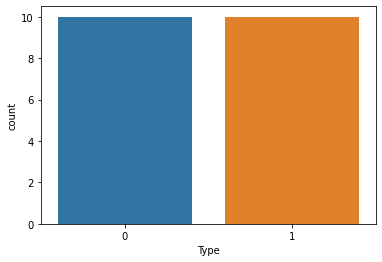

In [216]:
sns.countplot(df['Type'])

In [217]:
value = df['Type'].value_counts().values

In [218]:
value

array([10, 10], dtype=int64)

([<matplotlib.patches.Wedge at 0x23eb65dd370>,
 [Text(7.960204194457797e-17, 1.3, '1'),
  Text(-2.0206672185931328e-16, -1.1, '0')],
 [Text(4.898587196589413e-17, 0.8, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

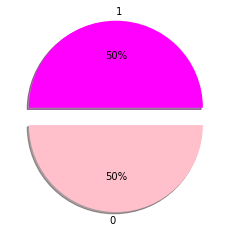

In [219]:

plt.pie(value ,
    explode=(0.2, 0),
    labels=label,
    colors=['magenta','pink'],
    autopct='%1.0f%%',
    pctdistance=0.6,
    shadow=True,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    normalize=None,
    data=None)

## Feature Selection plot

In [220]:
from sklearn.ensemble import ExtraTreesClassifier

In [221]:
model_f = ExtraTreesClassifier()

In [222]:
label = LabelEncoder()

In [223]:
df['Type'] = label.fit_transform(df['Type'])

In [224]:
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0
5,1,55,27,3,7,5,2,1,0
6,1,54,27,7,5,5,2,0,0
7,1,47,26,10,10,4,1,0,0
8,1,50,17,17,8,6,1,0,0
9,1,50,17,17,11,4,1,0,0


In [225]:
x = df.drop(labels =['Type'] ,axis = 1)

In [226]:
x.head(2)

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,55,28,3,7,5,2,0,0
1,47,24,12,6,9,1,0,0


In [227]:
y = df.iloc[: , 0]

In [228]:
y.head(2)

0    1
1    1
Name: Type, dtype: int64

In [229]:
df.head(2)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0


In [230]:
#x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)
x_train ,x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [231]:
x_train.head(2)

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
8,50,17,17,8,6,1,0,0
5,55,27,3,7,5,2,1,0


In [232]:
x_test.head(2)

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,55,28,3,7,5,2,0,0
17,38,15,31,8,6,1,1,0


In [233]:
y_train.head(2)

8    1
5    1
Name: Type, dtype: int64

In [234]:
y_test.head(2)

0     1
17    0
Name: Type, dtype: int64

In [235]:
model_f = ExtraTreesClassifier()

In [236]:
model_f.fit(x_train, y_train)

ExtraTreesClassifier()

In [237]:
model_f.feature_importances_

array([0.30347303, 0.08591459, 0.14093025, 0.10573966, 0.11343976,
       0.07483349, 0.17566922, 0.        ])

In [238]:
score = pd.DataFrame(model_f.feature_importances_ , columns = ['score'])

In [239]:
score

,score
0,0.303473
1,0.085915
2,0.140930
3,0.105740
4,0.113440
5,0.074833
6,0.175669
7,0.000000


In [240]:
Features = pd.DataFrame(x.columns , columns = ['Features'])

In [241]:
Features

,Features
0,Flour
1,Milk
2,Sugar
3,Butter
4,Egg
5,Baking Powder
6,Vanilla
7,Salt


In [242]:
feature_importance_score = pd.concat([Features , score] , axis  = 1)

In [243]:
feature_importance_score

,Features,score
0,Flour,0.303473
1,Milk,0.085915
2,Sugar,0.140930
3,Butter,0.105740
4,Egg,0.113440
5,Baking Powder,0.074833
6,Vanilla,0.175669
7,Salt,0.000000


In [244]:
feature_importance_score_nlarge= feature_importance_score.nlargest(10 , 'score')

In [245]:
feature_importance_score_nlarge

,Features,score
0,Flour,0.303473
6,Vanilla,0.175669
2,Sugar,0.140930
4,Egg,0.113440
3,Butter,0.105740
1,Milk,0.085915
5,Baking Powder,0.074833
7,Salt,0.000000


Text(0.5, 1.0, 'Feature Importance Plot by ExtraTressClassifier')

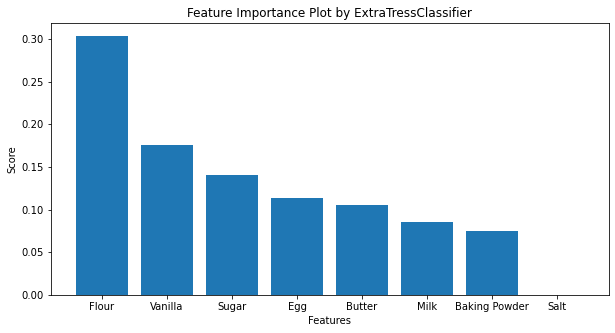

In [246]:
plt.figure(figsize = (10,5))
plt.bar(feature_importance_score_nlarge['Features'] , feature_importance_score_nlarge['score'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Importance Plot by ExtraTressClassifier')

In [247]:
from sklearn.feature_selection import mutual_info_classif

In [248]:
model_f_m = mutual_info_classif(x , y)

In [249]:
model_f_m

array([0.68543807, 0.2907898 , 0.45037855, 0.17162674, 0.11597378,
       0.        , 0.2439626 , 0.06361267])

In [250]:
score_m = pd.DataFrame(model_f_m , columns = ['score'])

In [251]:
score_m

,score
0,0.685438
1,0.290790
2,0.450379
3,0.171627
4,0.115974
5,0.000000
6,0.243963
7,0.063613


In [252]:
Features_m = pd.DataFrame(x.columns , columns = ['Features'])

In [253]:
Features_m

,Features
0,Flour
1,Milk
2,Sugar
3,Butter
4,Egg
5,Baking Powder
6,Vanilla
7,Salt


In [254]:
feature_importance_score_m = pd.concat([Features_m , score_m] , axis = 1)

In [255]:
feature_importance_score_m

,Features,score
0,Flour,0.685438
1,Milk,0.290790
2,Sugar,0.450379
3,Butter,0.171627
4,Egg,0.115974
5,Baking Powder,0.000000
6,Vanilla,0.243963
7,Salt,0.063613


In [256]:
feature_importance_score_m_nlarge = feature_importance_score_m.nlargest(8,'score')

In [257]:
feature_importance_score_m_nlarge

,Features,score
0,Flour,0.685438
2,Sugar,0.450379
1,Milk,0.290790
6,Vanilla,0.243963
3,Butter,0.171627
4,Egg,0.115974
7,Salt,0.063613
5,Baking Powder,0.000000


Text(0.5, 1.0, 'Feature Importance Plot by Mutual_innfo_classif')

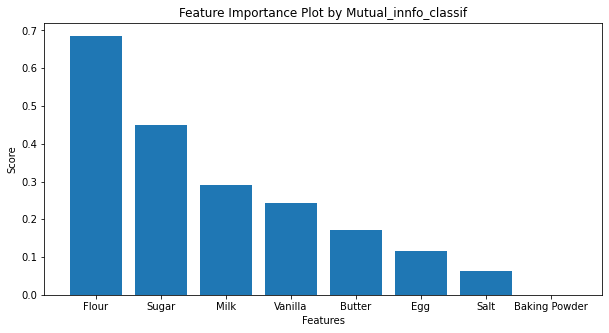

In [258]:
plt.figure(figsize = (10, 5))
plt.bar(feature_importance_score_m_nlarge['Features'] , feature_importance_score_m_nlarge['score'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Importance Plot by Mutual_innfo_classif')

In [259]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection  import SelectKBest

In [260]:
model_c = SelectKBest(score_func = f_classif , k = 'all')

In [261]:
model_c

SelectKBest(k='all')

In [262]:
model_c.fit(x, y)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

In [263]:
model_c.scores_

array([69.91440501,  9.90809667, 22.93597304,  8.98151951,  9.01559792,
        0.36      , 10.125     ,         nan])

In [264]:
score_c = pd.DataFrame(model_c.scores_ , columns = ['score'])

In [265]:
score_c

,score
0,69.914405
1,9.908097
2,22.935973
3,8.981520
4,9.015598
5,0.360000
6,10.125000
7,NaN


In [266]:
Features_c = pd.DataFrame(x.columns , columns =[ 'Feature'])

In [267]:
Features_c

,Feature
0,Flour
1,Milk
2,Sugar
3,Butter
4,Egg
5,Baking Powder
6,Vanilla
7,Salt


In [268]:
Feature_importance_score_c = pd.concat([Features_c , score_c] , axis= 1)

In [269]:
Feature_importance_score_c

,Feature,score
0,Flour,69.914405
1,Milk,9.908097
2,Sugar,22.935973
3,Butter,8.981520
4,Egg,9.015598
5,Baking Powder,0.360000
6,Vanilla,10.125000
7,Salt,NaN


In [270]:
Feature_importance_score_c_nlarge = Feature_importance_score_c.nlargest(8,'score')

In [271]:
Feature_importance_score_c_nlarge

,Feature,score
0,Flour,69.914405
2,Sugar,22.935973
6,Vanilla,10.125000
1,Milk,9.908097
4,Egg,9.015598
3,Butter,8.981520
5,Baking Powder,0.360000


Text(0.5, 1.0, 'Feature importance plot by f_classif')

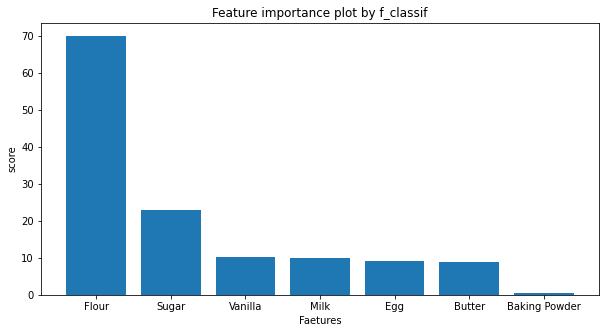

In [272]:
plt.figure(figsize = (10,5))
plt.bar(Feature_importance_score_c_nlarge['Feature'] ,Feature_importance_score_c_nlarge['score'])
plt.xlabel('Faetures')
plt.ylabel('score')
plt.title('Feature importance plot by f_classif')

In [362]:
label = LabelEncoder()
df['Type'] = label.fit_transform(df['Type'])

In [363]:
df.head(2)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0


In [364]:
x = df.loc[:, ['Flour' ,'Sugar']]
y = df.loc[: , 'Type']

In [365]:
x.head(2)

,Flour,Sugar
0,55,3
1,47,12


In [366]:
y.head(2)

0    1
1    1
Name: Type, dtype: int32

In [367]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

## Prepare the data

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


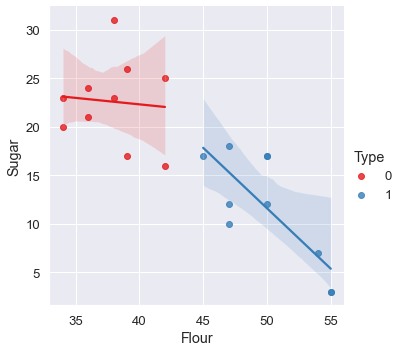

In [368]:
# hue - in a hue which column want to color encode
sns.lmplot('Flour' ,'Sugar' , data = df , hue = 'Type'  , palette = 'Set1')

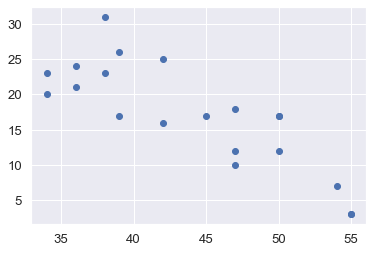

In [369]:
plt.scatter(df['Flour'] , df['Sugar'])

## Data is in linear but -ve linear

## model building

In [370]:
from sklearn.svm import SVC

In [371]:
model = SVC(kernel = 'linear')

## Fit the model

In [398]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [399]:
model.score(x_train, y_train)

1.0

In [400]:
from sklearn import svm

In [401]:
model_1 = svm.SVC()
model_1.fit(x_train , y_train)

SVC()

In [402]:
model_1.score(x_train , y_train)

0.9375

In [403]:
model_2 = svm.SVC(kernel = 'poly')
model_2.fit(x_train, y_train)

SVC(kernel='poly')

In [404]:
model_2.score(x_train , y_train)

1.0

## Data Visualization

In [405]:
model.coef_

array([[0.60868236, 0.17390925]])

In [406]:
model.intercept_

array([-29.34717784])

In [407]:
y_pred = model.predict(x_test)

In [408]:
y_pred

array([1, 0, 1, 1])

In [409]:
#model.predict([[20 , 40]])
model.predict([[42,20]])   # cupcacke

array([0])

In [411]:
model.support_vectors_

array([[42., 16.],
       [45., 17.],
       [47., 10.]])

In [413]:
np.linspace(30,60)

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

In [414]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


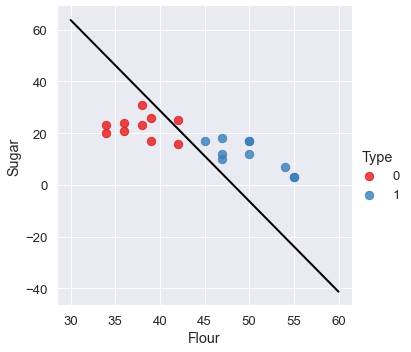

In [432]:
# Plot the hyperplane
sns.lmplot('Flour' , 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy , linewidth = 2 , color = 'black')

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


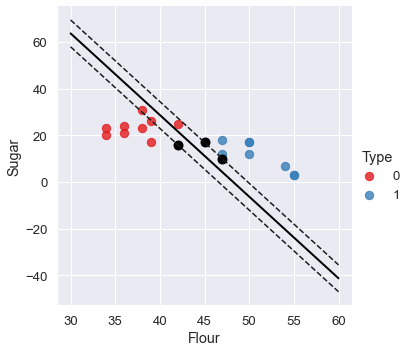

In [439]:
sns.lmplot('Flour' , 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70}) # two classes
plt.plot(xx ,yy , linewidth = 2, color = 'black') # hyperplane
plt.plot(xx, yy_down, 'k--' ) #marginLine1 # down marginal plane
plt.plot(xx, yy_up  , 'k--') #margineLine2
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='black');

# To predict new case

In [444]:
def muffin_cupcake(Floar , Sugar):
    if model.predict([[Floar , Sugar]]) == 0:
        print(" You're looking for Cupcake")
    else:
        print("You're looking for muffin")
        
muffin_cupcake(20 , 30)

 You're looking for Cupcake


C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


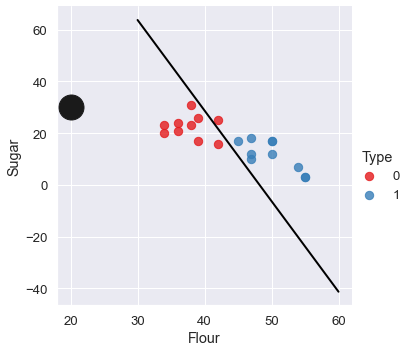

In [461]:
sns.lmplot('Flour' , 'Sugar' , data = df ,  hue = 'Type' , palette = 'Set1' , fit_reg = False  ,scatter_kws = {'s': 70}) # data scatter
plt.plot(xx , yy , linewidth = 2 , color = 'black') # hyperplane
plt.plot( 20 ,30 , 'ko' , markersize = '25' , )